In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
data = np.genfromtxt('ex2data1.txt',delimiter=',')
data.shape

(100, 3)

In [3]:
X = data[:,0:-1]
y = data[:,-1]
m = np.size(y)
# Adding the intercept term to X
X = np.hstack((np.ones((m,1)),X))
n = X.shape[1]
n

3

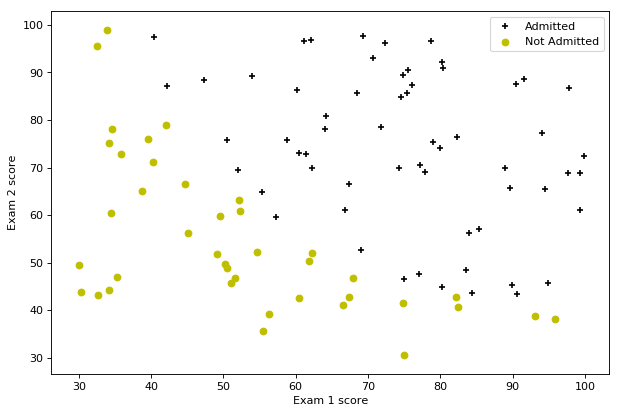

In [4]:
# Scatter Plot of the data
pos = np.nonzero(y==1)
neg = np.nonzero(y==0)
plt.figure(figsize=(9,6),dpi=80)
plt.scatter(X[pos,1],X[pos,2],c='k',marker='+',
            label="Admitted")
plt.scatter(X[neg,1],X[neg,2],c='y',marker='o',
             label="Not Admitted")
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc = 'upper right')
plt.show()

In [5]:
# Intializing parameters Theta
theta0 = np.zeros(n)
theta0

array([0., 0., 0.])

In [6]:
# Sigmoid Funtion
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [7]:
# Cost Function and Gradient for Logistic Regression
def costFunction(t,X,y):
    m = y.size
    h = sigmoid(X.dot(t))
    J = (-1.0/m)*(np.sum(y*np.log(h) + (1-y)*np.log(1-h)))
    grad = (1.0/m)*((X.T).dot(h-y))
  
    return J,grad  

In [8]:
# Computing Cost and Gradient with intitial Theta (zeros)
J,G = costFunction(theta0,X,y)
print "Cost: ", J
print "Gradient: "
print G


Cost:  0.6931471805599453
Gradient: 
[ -0.1        -12.00921659 -11.26284221]


In [9]:
# Compute and display cost and gradient with theta = [-24;0.2;0.2]
J,G = costFunction(np.array([-24,0.2,0.2]),X,y)
print "Cost: ", J
print "Gradient: "
print G

Cost:  0.2183301938265978
Gradient: 
[0.04290299 2.56623412 2.64679737]


In [10]:
# Optimizing the parameters theta using scipy.optimize
res = minimize(costFunction,theta0,args=(X,y),method = 'Newton-CG',jac = True
               ,options={'disp':True})            

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 27
         Function evaluations: 72
         Gradient evaluations: 230
         Hessian evaluations: 0


In [11]:
# Pararmeter values obtained using scipy
final_theta = res.x
final_theta

array([-25.16404043,   0.20625335,   0.20149352])

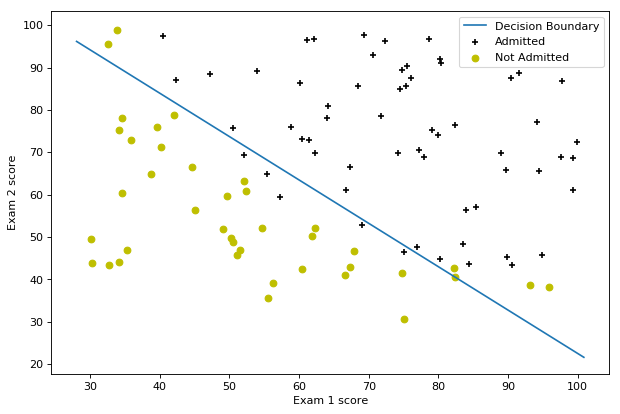

In [12]:
plt.figure(figsize=(9,6),dpi=80)
plt.scatter(X[pos,1],X[pos,2],c='k',marker='+',
            label="Admitted")
plt.scatter(X[neg,1],X[neg,2],c='y',marker='o',
             label="Not Admitted")
x1_vals = np.array([np.min(X[:,1]-2,),np.max(X[:,2]+2)])
x2_vals = -(final_theta[0]+final_theta[1]*x1_vals)/final_theta[2]
plt.plot(x1_vals,x2_vals,label = 'Decision Boundary')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc = 'upper right')
plt.show()

In [13]:
# Predicting admission probability for a student with scores 45,85
val = np.array([1,45,85])
prob = sigmoid(val.dot(final_theta))
print "For a student with scores 45 and 85,s we predict an admission probability of: ",round(prob,2)

For a student with scores 45 and 85,s we predict an admission probability of:  0.78


In [14]:
# Computing the accuracy of the classifier on the Training Set
# probabilities >= 0.5 are considered 1 and the rest 0
p = (X.dot(final_theta) >= 0)
accuracy = np.mean(p == y)*100
print "Accuracy on the Training Set %s %%" % accuracy

Accuracy on the Training Set 89.0 %
